In [ ]:
import cv2
from skimage import io
#from matplotlib import pyplot as
from tqdm import tqdm
import os 

path = "/content/drive/MyDrive/covid-data/ML COVID/no"
Clahe_Path = "/content/drive/MyDrive/CLAHE CONVERT/COVID_No/"

i=1
for img in tqdm(os.listdir(path)):  # iterate over each image per authentic and forged
    img_array = cv2.imread(os.path.join(path,img))  # convert to array

    #img = cv2.imread('images/retina.jpg', 1)

    #Converting image to LAB Color so CLAHE can be applied to the luminance channel
    lab_img= cv2.cvtColor(img_array, cv2.COLOR_BGR2LAB)

    #Splitting the LAB image to L, A and B channels, respectively
    l, a, b = cv2.split(lab_img)

    #plt.hist(l.flat, bins=100, range=(0,255))
    ###########Histogram Equlization#############
    #Apply histogram equalization to the L channel
    #equ = cv2.equalizeHist(l)

    #plt.hist(equ.flat, bins=100, range=(0,255))
    #Combine the Hist. equalized L-channel back with A and B channels
    #updated_lab_img1 = cv2.merge((equ,a,b))

    #Convert LAB image back to color (RGB)
    #hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

    ###########CLAHE#########################
    #Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(l)
    #plt.hist(clahe_img.flat, bins=100, range=(0,255))

    #Combine the CLAHE enhanced L-channel back with A and B channels
    updated_lab_img2 = cv2.merge((clahe_img,a,b))

    #Convert LAB image back to color (RGB)
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
    cv2.imwrite(Clahe_Path + str(i) + ".png", CLAHE_img )
    i+=1

    #plt.imshow(img)
 

100%|██████████| 841/841 [02:10<00:00,  6.46it/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


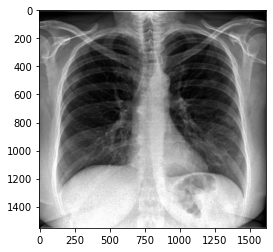

In [ ]:
plt.imshow(hist_eq_img)


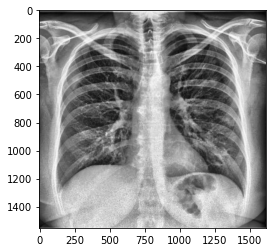

In [ ]:
plt.imshow(CLAHE_img)
cv2.waitKey(0)
cv2.destroyAllWindows()